## EE 242 Lab 4a – Digital Filtering - Various Filters

Caitie DeShazo-Couchot

This lab has 2 exercises to be completed as a team. Each should be given a separate code cell in your Notebook, followed by a markdown cell with report discussion. Your notebook should start with a markdown title and overview cell, which should be followed by an import cell that has the import statements for all assignments. For this assignment, you will need to import: numpy, the wavfile package from scipy.io, simpleaudio/librosa, and matplotlib.pyplot.  

In [27]:
# We'll refer to this as the "import cell." Every module you import should be imported here.
%matplotlib notebook
import numpy as np
import matplotlib
import scipy.signal as sig
import matplotlib.pyplot as plt

# import whatever other modules you use in this lab -- there are more that you need than we've included 
import IPython as ip
%matplotlib inline

## Summary

In this lab, we will consider different types of digital filters (specifically discrete-time, linear, time-invariant filters) and look at their characterization in both time and frequency. This will give you some insight into how digital filters are implemented and into the properties of different digital filter design algorithms. You’ll also learn about some of the signal processing functions available from the signal module in the scipy package which will be useful for designing and implement filters.  You will work with examples that show you how filtering can be useful to remove noise and reshape the frequency content of a signal. Specifically, we’ll revisit the lab 2 problem of removing noise from signals (or smoothing signals), then explore filter design methods, and finally implement a simple audio equalizer. This is a 2-week lab. It is recommended to work on the first 2 assignments in the first week and the remaining 
assignments in the second week. 

## Lab 4a turn in checklist

•	Lab 4a Jupyter notebook with code for the 2 exercises assignment in separate cells. Each assignment cell should contain markdown cells (same as lab overview cells) for the responses to lab report questions. Include your lab members’ names at the top of the notebook.

**Please submit the report as PDF** (You may also use : https://www.vertopal.com/  suggested by a student)

## Assignment 1 -- Different Filter Implementations

In this lab, we will be using standard tools to design filters, and we’ll want to view them in both the time and frequency domain. In this assignment, you will write and test functions for plotting the frequency response and the impulse response of a system given the filter coefficients {a, b}. This assignment will have three parts, A-C.

**A.** The response that is most often illustrated is the magnitude frequency response on a dB scale. Write a function that takes as input the filter coefficients, an optional flag for plotting both the magnitude and phase of the frequency response, and an optional sampling frequency. The function should generate either a plot of the magnitude or both the magnitude and the phase side-by-side, depending on the flag, with the default being magnitude only. The magnitude of the frequency response should be plotted on a dB scale with a range of [-100,0].  If no sampling frequency is provided, use radians for the frequency axis; otherwise use a Hz scale. 

**B.**  Write a second function that takes as input the filter coefficients and a desired impulse response length, computes and returns the impulse response, and also plots the impulse response using a stem plot.

**C.**  Test the functions by plotting the magnitude, phase and impulse responses of two lowpass filters with a frequency cut-off of 0.15. One should be an FIR filter designed using the signal.firwin function (order 20) and the other should be an IIR filter with the signal.butter function (order 10).


In [28]:
# Assignment 1 - Different Filter Implementations

# Part A

def plot_mag_freq_response(b, a, plot_phase = 0, fs = 0):
    w,h = sig.freqz(b,a) #frequency response is h and frequencies are w
    fig = plt.figure()   #create a figure
    
    #Determine Hz or Radians depending on fs
    if (fs != 0):
        w = (w * fs) / np.pi
        x_label = "Frequency in Hz"
    else:
        x_label = "Frequency in Radians"
    
    #Plot the amplitude or amplitude and plot phase depending on plot_phase
    if (plot_phase != 0): 
        #Amplitude
        plt.subplot(2,1,1)
        plt.xlabel(x_label)
        plt.ylabel("Magnitude (dB)")
        plt.ylim((-100, 0))
        plt.plot(w, 20*np.log10(abs(h)))
        
        #Phase
        plt.subplot(2,1,2)
        plt.xlabel(x_label)
        plt.ylabel("Phase (radian)")
        plt.plot(w, np.unwrap(np.angle(h)))  
    else:    
        #Just amplitude
        plt.xlabel(x_label)
        plt.ylabel("Phase (radian)")
        plt.ylim((-100, 0))
        plt.plot(w, 20*np.log10(abs(h)))
        
    return fig

In [29]:
# Part B
# Hint: Use signal.lfilter 

def plot_imp_response(b, a, imp_len):
    fig = plt.figure()
    plt.xlabel("Samples")
    plt.ylabel("Amplitude")

    imp = sig.unit_impulse(imp_len, 'mid')
    y = sig.lfilter(b, a, imp)
    
    plt.stem(np.arange(0, imp_len // 2), y[len(y) // 2:])
    return y

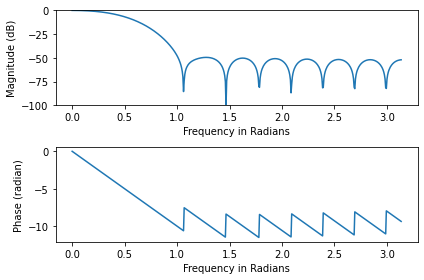

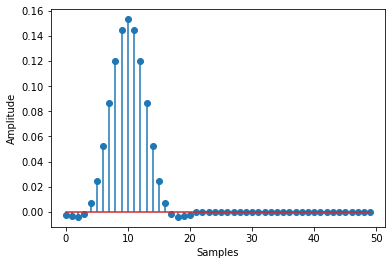

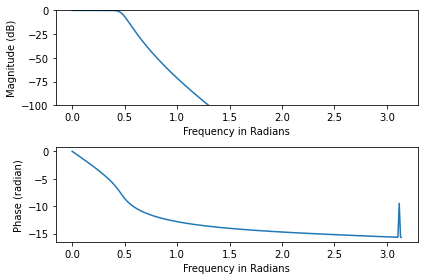

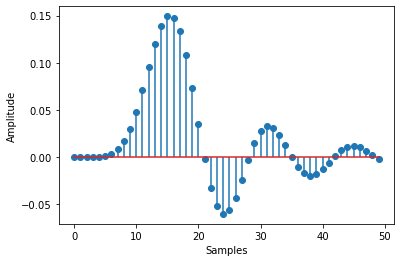

In [30]:
# Part C
# Use signal.firwin and signal.butter

fir = sig.firwin(21, 0.15)
iir_b, iir_a = sig.butter(10, 0.15)

#Plots magnitude, frequency, and impulse responses of FIR filters
plot_mag_freq_response(fir, 1, plot_phase=1)
plt.tight_layout()
imp_fir = plot_imp_response(fir, 1, 100)

#Plots magnitude, frequency, and impulse responses of IIR filters
plot_mag_freq_response(iir_b, iir_a, plot_phase=1)
plt.tight_layout()
imp_iir = plot_imp_response(iir_b, iir_a, 100)

###  Discussion

 Comment on the differences between the two filters in terms of the magnitude, phase and impulse responses.  What are the tradeoffs associated with these differences?
 
 The magnitude graph has an FIR filter which has a wavy display and drop in magnitude in the stopband but the IIR filter remains smooth with less change in the magnitude. In the phase, the FIR filter is linear with minimal phase distortion while the IIR has more phase distortion due to the non-linear phase in transition.

## Assignment 2 -- Different Filter Implementations for Smoothing Signals 

In lab 2A, assignment 2, you experimented with smoothing a noisy signal using a moving average window and a convolution. The convolution used an impulse response h[n] that was a causal version of the moving average window. In this problem, you will implement the smoothing function using the both convolution and the signal.lfilter command, to see that they give the same result. This assignment will have three parts, A-C.


**A.**  Using the code from lab 2, create a base time signal and a noisy version of it by adding random noise generated with the numpy.random.randn() function (the standard normal distribution, which is zero mean and unit variance). Plot the original and noisy signals together with the original overlaid on the noisy version, with the time axis labeled assuming a sampling rate of 1000 Hz. Constrain the y-axis to be [0,25] for all plots. Include a legend with the plot.

**B.**  Create one smoothed version of the signal called filtsig1 by using the convolve function from lab 2 with the box impulse response and k=10. Create a second version called filtsig2 by using the signal.lfilter function. Recall that for the FIR filter, the impulse response is equal to the b coefficient vector. Plot the two filtered signals overlaid. Recall that the convolve function will change the length, so you will need to define a new time vector for that. You should find that the two methods give the same result except for edge effects.

**C.**  Use the function that you wrote in assignment 1 to plot the magnitude and phase for the frequency response of this filter. It should look like a low pass filter.


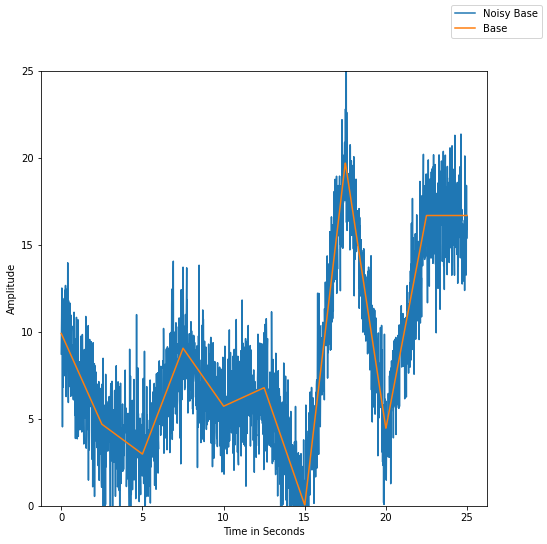

In [41]:
# Assignment 2 - Different Filter Implementations for Smoothing Signals

# Part A
# Base and noise signal from lab 2
p     = 10 # points for piecewise linear signal
srate = 1000
time = np.arange(0,2,1/srate)
n = len(time)
amp = 20   # amplitude range of base signal
base = np.interp(np.linspace(0,p,n),np.arange(0,p),np.random.rand(p)*amp)

# create some random noise to be added to the abve base signals
noiseamp = 2
noise  = noiseamp * np.random.randn(n)

t = np.linspace(0,25,n)
noisy_base = np.add(base, noise)

a = plt.figure(5,figsize=(8,8))
plt.xlabel("Time in Seconds")
plt.ylabel("Amplitude")
plt.ylim(0, 25)
plt.plot(t, noisy_base, label="Noisy Base")
plt.plot(t, base, label="Base")
a.legend()

<bound method FigureBase.legend of <Figure size 576x576 with 1 Axes>>

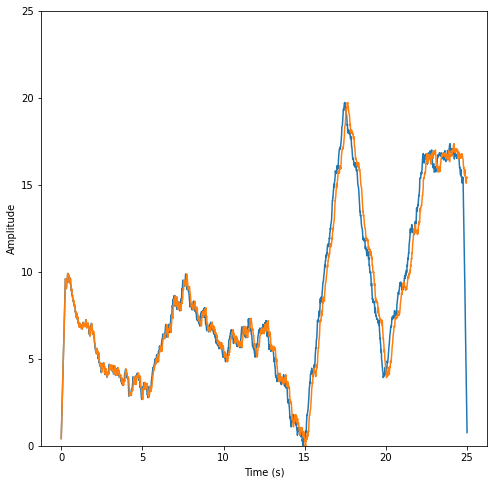

In [44]:
# Part B
# Use signal.lfilter to apply your filter

k = 10
hfilt = np.ones(2*k+1)/(2*k+1)

#filter from convolving hfilt and noisy_base
filtsig1 = np.convolve(noisy_base, hfilt)
t1 = np.linspace(0,25,len(filtsig1))

#lfilter on hfilt
filtsig2 = sig.lfilter(hfilt,1,noisy_base)

#Plot
a=plt.figure(6,figsize=(8,8))
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.ylim(0, 25)
plt.plot(t1, filtsig1, label="Convolved")
plt.plot(t, filtsig2, label="Sig.lfilter")
a.legend

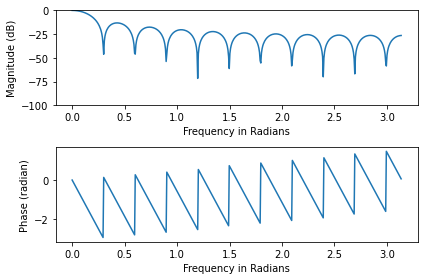

In [45]:
# Part C

plot_mag_freq_response(hfilt, 1, plot_phase=1)
plt.tight_layout()

###  Discussion

The moving window average (and its causal version) is an FIR filter, so the phase should be linear. How might the result change if you used a Butterworth filter?

The Butterworth filter causes a more unstable and less smoothed filter as opposed to a FIR filter. This is because the Butterworth filter in a non-linear phase between the passband and stopband.